# Tổng quan dữ liệu

## Tổng quan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

# Đọc dữ liệu
df = pd.read_csv("Data/powerconsumption.csv")
df.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## Thống kê tổng quát 

In [4]:
print("Shape:", df.shape)
print("\nThông tin kiểu dữ liệu:")
print(df.info())
print("\nThống kê tổng quát:")
print(df.describe())


Shape: (52416, 9)

Thông tin kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None

Thống kê tổng quát:
        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959

# Tiền xử lí dữ liệu

## Kiểm tra dữ liệu thiếu của hàng và cột

In [5]:
print("Số lượng giá trị thiếu theo cột:")
print(df.isnull().sum())
print("\nSố lượng giá trị thiếu theo hàng:")
print(df.isnull().sum(axis=1))

Số lượng giá trị thiếu theo cột:
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

Số lượng giá trị thiếu theo hàng:
0        0
1        0
2        0
3        0
4        0
        ..
52411    0
52412    0
52413    0
52414    0
52415    0
Length: 52416, dtype: int64


In [6]:
missing = df.isnull().sum()
print("📋 Giá trị thiếu:")
print(missing[missing > 0])

# Loại bỏ các dòng có giá trị thiếu
df = df.dropna()
print(f"✅ Đã loại bỏ dòng có giá trị thiếu. Số dòng còn lại: {len(df)}")

📋 Giá trị thiếu:
Series([], dtype: int64)
✅ Đã loại bỏ dòng có giá trị thiếu. Số dòng còn lại: 52416


## Xử lí thời gian

In [7]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday
df[['Datetime', 'Hour', 'Minute', 'Day', 'Month', 'Weekday']].head()

,Datetime,Hour,Day,Month,Weekday
0,2017-01-01 00:00:00,0,1,1,6
1,2017-01-01 00:10:00,0,1,1,6
2,2017-01-01 00:20:00,0,1,1,6
3,2017-01-01 00:30:00,0,1,1,6
4,2017-01-01 00:40:00,0,1,1,6


## Ma trận tương quan

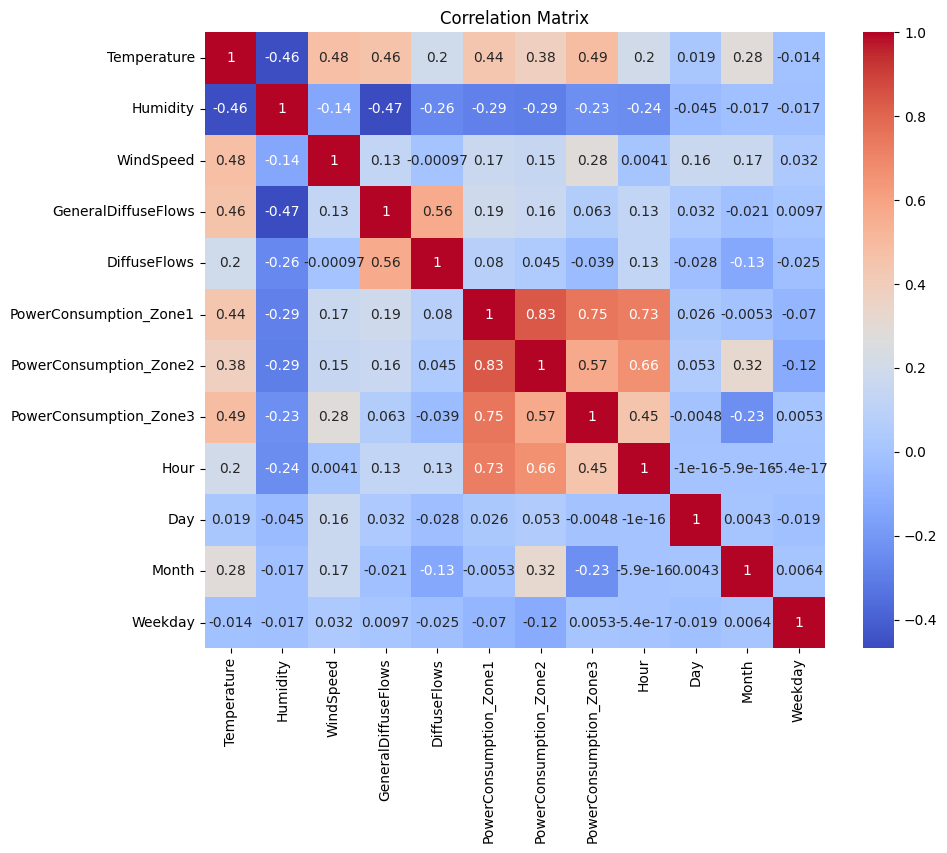

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Biểu đồ phân phối

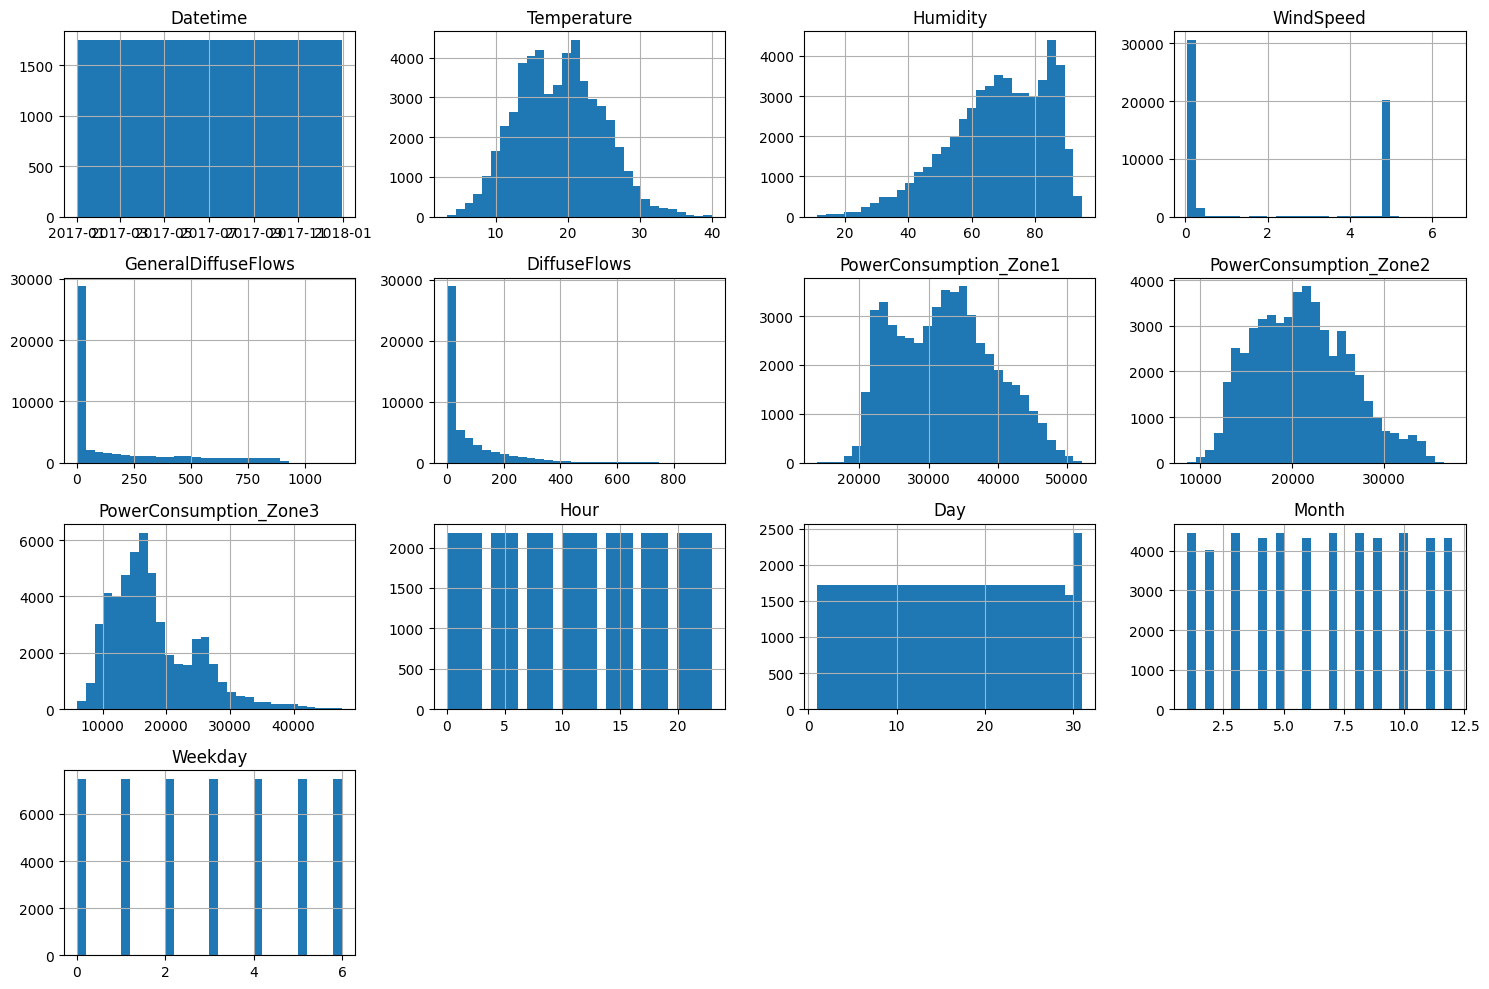

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


## Tương quan chi tiết

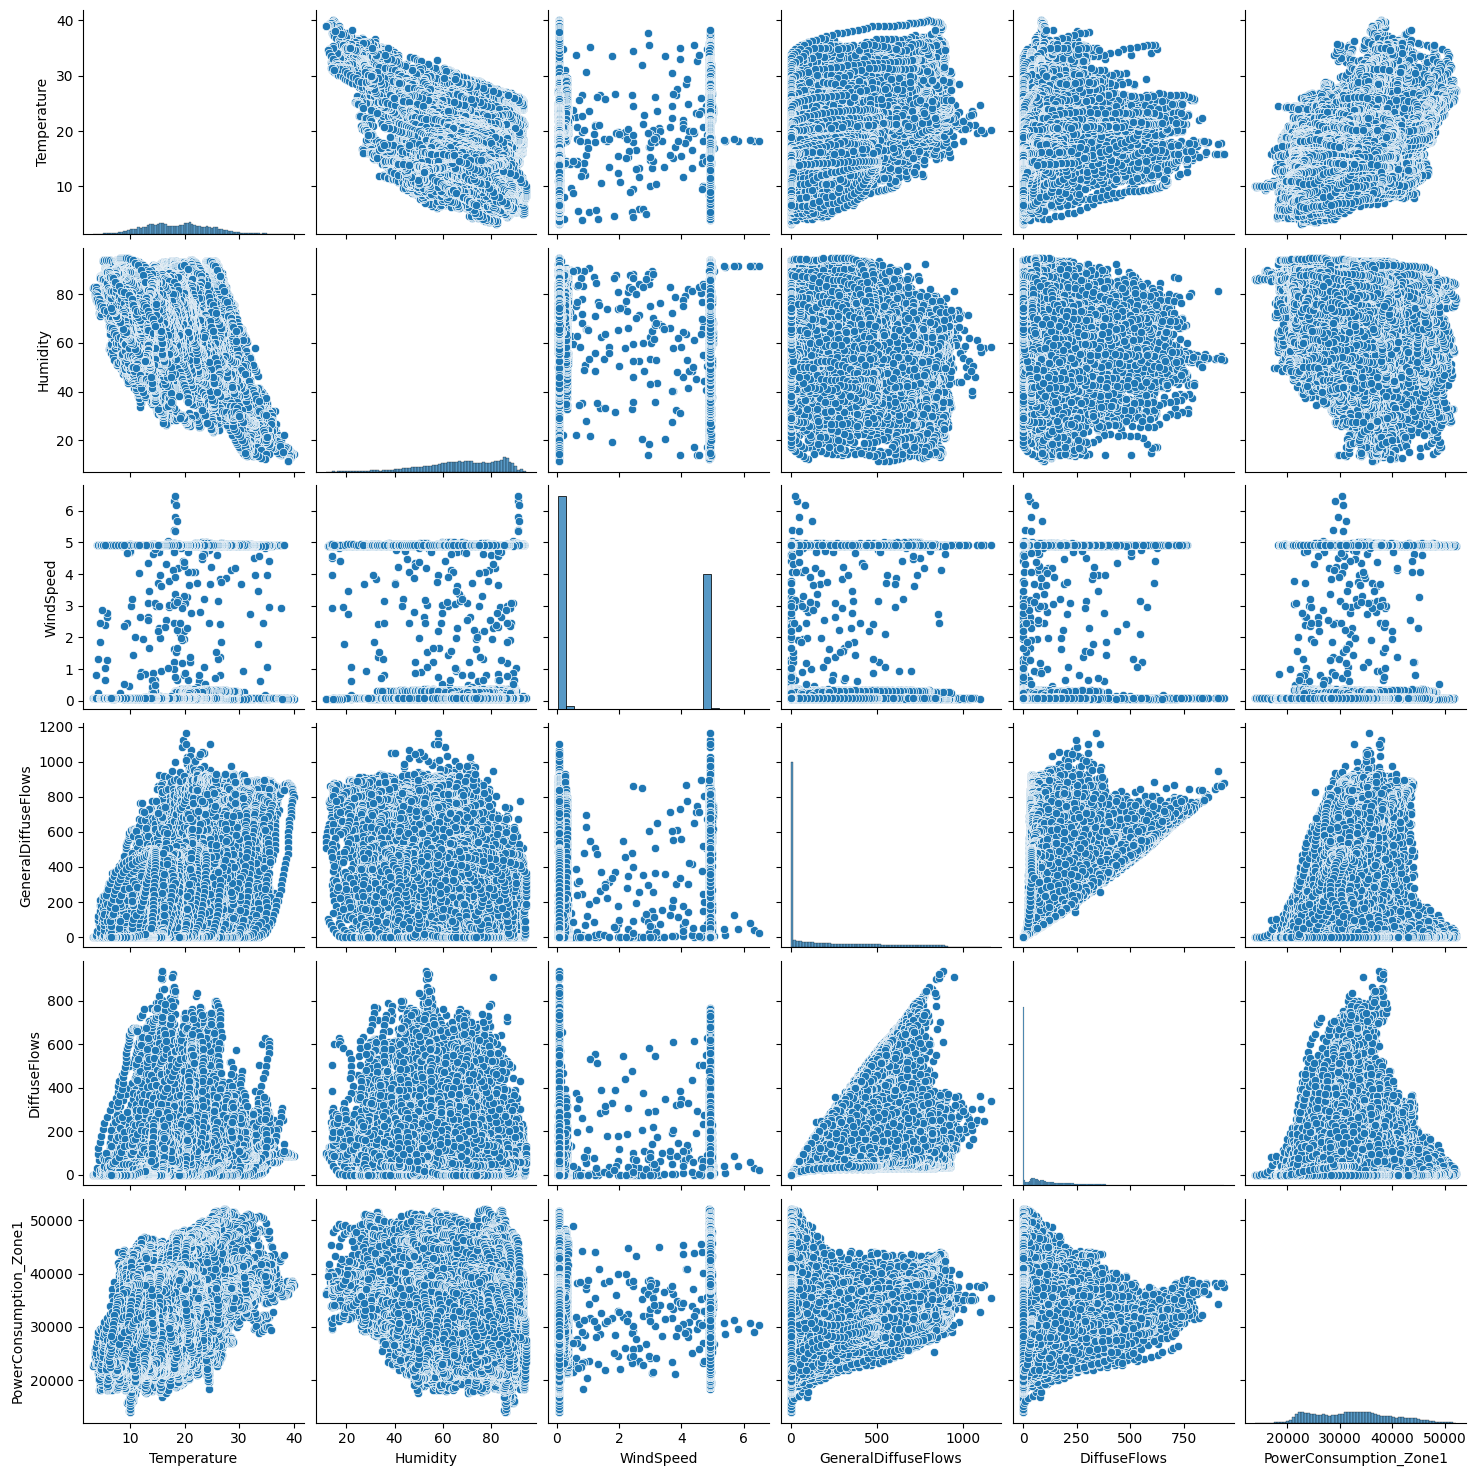

In [10]:

subset = df[['Temperature', 'Humidity', 'WindSpeed', 
             'GeneralDiffuseFlows', 'DiffuseFlows', 
             'PowerConsumption_Zone1']]
sns.pairplot(subset)
plt.show()

## Trung bình tiêu thụ điện năng

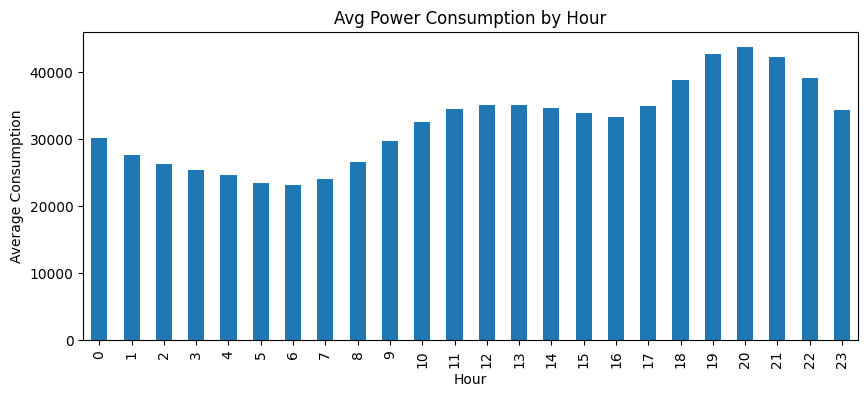

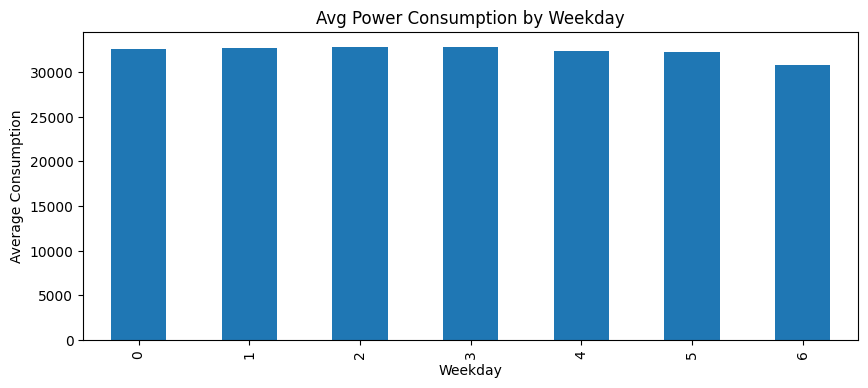

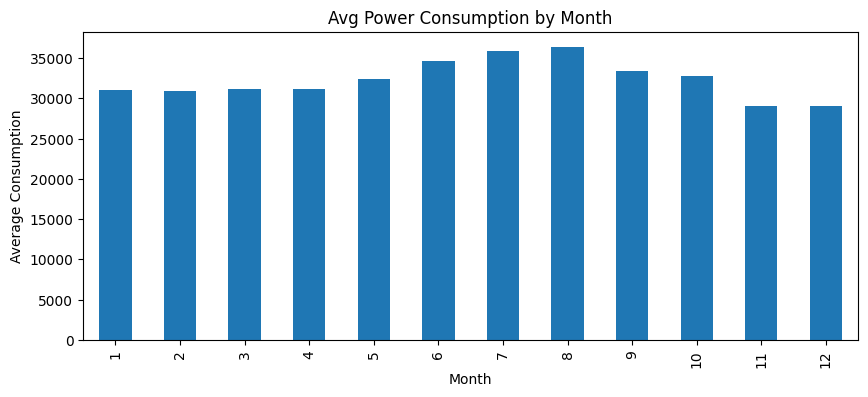

In [ ]:
# Trung bình theo giờ
hourly_avg = df.groupby('Hour')['PowerConsumption_Zone1'].mean()
hourly_avg.plot(kind='bar', figsize=(10, 4), title='Avg Power Consumption by Hour')
plt.ylabel("Average Consumption")
plt.show()

# Trung bình theo thứ
weekday_avg = df.groupby('Weekday')['PowerConsumption_Zone1'].mean()
weekday_avg.plot(kind='bar', figsize=(10, 4), title='Avg Power Consumption by Weekday')
plt.ylabel("Average Consumption")
plt.show()

# Trung bình theo tháng
monthly_avg = df.groupby('Month')['PowerConsumption_Zone1'].mean()
monthly_avg.plot(kind='bar', figsize=(10, 4), title='Avg Power Consumption by Month')
plt.ylabel("Average Consumption")
plt.show()



# Pre Trainning

## Tách các đặc trưng và target

In [ ]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'Hour']
target = 'PowerConsumption_Zone1' 

X = df[features]
y = df[target]

print("✅ Đã tách đặc trưng và mục tiêu:")
print("X shape:", X.shape)
print("y shape:", y.shape)


## Chia tập dữ liệu train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Chuẩn hoá dữ liệu

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Đã chuẩn hóa dữ liệu:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("Ví dụ:")
print(X_train_scaled[:5])

# Train mô hình

## Định nghĩa 3 model và dùng GridSearchCV tìm ra các tham số tốt nhất cho model

In [ ]:
# Define models and parameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 9],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0, 0.1, 0.2],
            'reg_alpha': [0, 0.1, 1],
            'reg_lambda': [1, 1.5, 2]
        }
    }
}


## Trainning model

In [ ]:
best_models = {}
for name, config in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(estimator=config['model'], param_grid=config['params'], 
                         scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid.fit(X_train_scaled, y_train)
    best_models[name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': -grid.best_score_
    }

# Print best models and their scores
for name, result in best_models.items():
    print(f"{name}:")
    print(f"Best Params: {result['best_params']}")
    print(f"Best Score (MSE): {result['best_score']}")

## So sánh model với dữ liệu thực

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Thực tế', linewidth=2)

# Use the best models from GridSearchCV
best_lr = best_models['LinearRegression']['best_estimator']
best_rf = best_models['RandomForest']['best_estimator']
best_xgb = best_models['XGBoost']['best_estimator']

y_pred_lr = best_lr.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_xgb = best_xgb.predict(X_test_scaled)

plt.plot(y_pred_lr[:100], label='Linear Reg', linestyle='--')
plt.plot(y_pred_rf[:100], label='Random Forest', linestyle='--')
plt.plot(y_pred_xgb[:100], label='XGBoost', linestyle='--')
plt.title('So sánh dự đoán với dữ liệu thực tế (100 điểm đầu)')
plt.xlabel('Thời điểm')
plt.ylabel('Tiêu thụ điện năng')
plt.legend()
plt.grid(True)
plt.show()

## Lưu mô hình và scaler

In [ ]:
# Save the best models and scaler
joblib.dump(best_models['LinearRegression']['best_estimator'], "linear_regression_model.pkl")
joblib.dump(best_models['RandomForest']['best_estimator'], "random_forest_model.pkl")
joblib.dump(best_models['XGBoost']['best_estimator'], "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Đã lưu mô hình tốt nhất và scaler.")
